# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [43]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [44]:
# a)
A1, b1 = main.random_matrix_Ab(10)
# b)
A2, b2 = main.diag_dominant_matrix_A_b(10)
# c)
A3, b3 = main.symmetric_matrix_A_b(10)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [45]:
#1
print(np.linalg.solve(A1, b1))
#2
if main.is_diag_dominant(A1):
    x_int = np.zeros((10, 1))
    x2 = main.solve_jacobi(A1, b1, x_int)
    print(main.residual_norm(A1, x2, b1))
else:
    print('nie można użyć tej metody, gdyż macierz nie jest diagonalna')
#3
if main.is_symmetric(A1):
    x3 = sp.sparse.linalg.cg(A1, b1)
    print(main.residual_norm(A1, x3, b1))
else:
    print('nie można użyć tej metody, gdyż macierz nie jest symetryczna')
#4
print(sp.sparse.linalg.gmres(A1,b1))

[ 11.60552536  -5.32173533  -5.50194254  -0.46312403   1.38861257
  14.78869154   3.43248429  -0.99788445  -0.94198831 -15.74548709]
nie można użyć tej metody, gdyż macierz nie jest diagonalna
nie można użyć tej metody, gdyż macierz nie jest symetryczna
(array([ 11.60552536,  -5.32173533,  -5.50194254,  -0.46312403,
         1.38861257,  14.78869154,   3.43248429,  -0.99788445,
        -0.94198831, -15.74548709]), 0)


In [46]:
#1
x1 = np.linalg.solve(A1, b1)
print(main.residual_norm(A1, x1, b1))
#2
if main.is_diag_dominant(A1):
    x_int = np.zeros((10, 1))
    x2 = main.solve_jacobi(A1, b1, x_int)
    print(main.residual_norm(A1, x2, b1))
else:
    print('macierz nie spełnia warunków do rozwiązania tą metodą')
#3
if main.is_symmetric(A1):
    x3 = sp.sparse.linalg.cg(A1, b1)
    print(main.residual_norm(A1, x3, b1))
else:
    print('macierz nie spełnia warunków do rozwiązania tą metodą')
#4
x4, exitCode = sp.sparse.linalg.gmres(A1, b1)
print(main.residual_norm(A1, x4, b1))

2.499050622627262e-13
macierz nie spełnia warunków do rozwiązania tą metodą
macierz nie spełnia warunków do rozwiązania tą metodą
1.129472439061693e-12


In [56]:
%%timeit
#1
x1 = np.linalg.solve(A1, b1)

133 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


905 µs ± 203 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
775 µs ± 57.5 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
736 µs ± 11.4 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
821 µs ± 91.9 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
729 µs ± 99.1 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


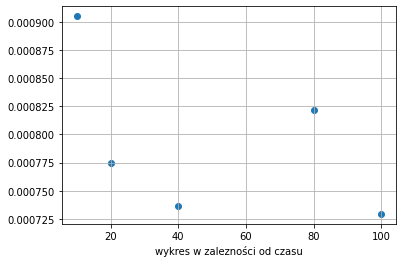

In [52]:
#1
it = [10, 20, 40, 80, 100]
blad = []
t = []
for i in it:
    t1 = %timeit -r 3 -n 5 -o (sp_linalg.gmres(A1, b1, maxiter = i ))
    t.append(t1.average)
    blad.append(t1.stdev)

plt.scatter(it, t)
plt.xlabel("wykres w zalezności od czasu")
plt.grid()
plt.show()

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [ ]:
#1
print(np.linalg.solve(A2, b2))
#2
if main.is_diag_dominant(A2):
    x_int = np.zeros((10, 1))
    print(main.solve_jacobi(A2, b2, x_int))
    
else:
    print('nie można użyć tej metody, gdyż macierz nie jest diagonalna')
#3
if main.is_symmetric(A2):
    x3 = sp.sparse.linalg.cg(A2, b2)
    print(main.residual_norm(A2, x3, b2))
else:
    print('nie można użyć tej metody, gdyż macierz nie jest symetryczna lub dodatnie określona')
#4
print(sp.sparse.linalg.gmres(A2,b2))

[-0.01555625  0.02896471  0.03177538  0.02715727  0.06925766  0.05250547
  0.0061119   0.03565031  0.08334973  0.04808132]
(array([[0.        , 0.04159464, 0.04159464, 0.04159464, 0.06239196,
        0.06239196, 0.01039866, 0.04159464, 0.07279062, 0.0519933 ],
       [0.        , 0.02912382, 0.02912382, 0.02912382, 0.04368573,
        0.04368573, 0.00728095, 0.02912382, 0.05096668, 0.03640477],
       [0.        , 0.03409214, 0.03409214, 0.03409214, 0.0511382 ,
        0.0511382 , 0.00852303, 0.03409214, 0.05966124, 0.04261517],
       [0.        , 0.02767882, 0.02767882, 0.02767882, 0.04151823,
        0.04151823, 0.00691971, 0.02767882, 0.04843794, 0.03459853],
       [0.        , 0.04147116, 0.04147116, 0.04147116, 0.06220675,
        0.06220675, 0.01036779, 0.04147116, 0.07257454, 0.05183896],
       [0.        , 0.03071794, 0.03071794, 0.03071794, 0.04607691,
        0.04607691, 0.00767949, 0.03071794, 0.0537564 , 0.03839743],
       [0.        , 0.04903833, 0.04903833, 0.04903833

In [ ]:
#1
x1 = np.linalg.solve(A2, b2)
print(main.residual_norm(A2, x1, b2))
#2
if main.is_diag_dominant(A2):
    x_int = np.zeros((10, 1))
    x2 = main.solve_jacobi(A2, b2, x_int)[0]
    print(main.residual_norm(A2, x2, b2))
else:
    print('macierz nie spełnia warunków do rozwiązania tą metodą')
#3
if main.is_symmetric(A2):
    x3 = sp.sparse.linalg.cg(A2, b2)
    print(main.residual_norm(A2, x3, b2))
else:
    print('macierz nie spełnia warunków do rozwiązania tą metodą')
#4
x4, exitCode = sp.sparse.linalg.gmres(A2, b2)
print(main.residual_norm(A2, x4, b2))

1.793620188084545e-15
None
macierz nie spełnia warunków do rozwiązania tą metodą
8.640883812826315e-05


In [ ]:
%%timeit
#1
t1 = (np.linalg.solve(A2, b2))

311 µs ± 77 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


1.03 µs ± 472 ns per loop (mean ± std. dev. of 3 runs, 5 loops each)
933 ns ± 330 ns per loop (mean ± std. dev. of 3 runs, 5 loops each)
833 ns ± 217 ns per loop (mean ± std. dev. of 3 runs, 5 loops each)
860 ns ± 184 ns per loop (mean ± std. dev. of 3 runs, 5 loops each)
887 ns ± 278 ns per loop (mean ± std. dev. of 3 runs, 5 loops each)


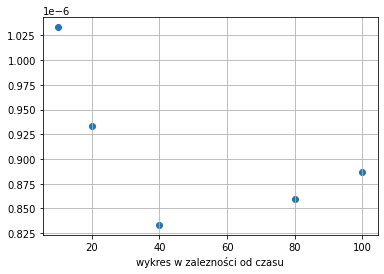

In [60]:

#2
it = [10, 20, 40, 80, 100]
blad = []
t = []
for i in it:
    t1 = %timeit -r 3 -n 5 -o (main.solve_jacobi(A2, b2, x_init = 1))
    t.append(t1.average)
    blad.append(t1.stdev)

plt.scatter(it, t)
plt.xlabel("wykres w zalezności od czasu")
plt.grid()
plt.show()

670 µs ± 140 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
599 µs ± 81.3 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
517 µs ± 65.5 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
515 µs ± 59.2 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
528 µs ± 69.1 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


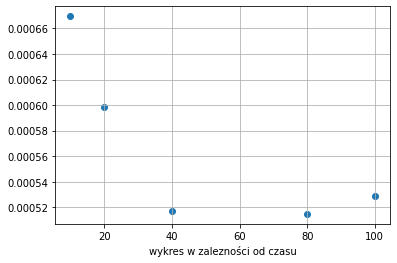

In [58]:
#4
it = [10, 20, 40, 80, 100]
blad = []
t = []
for i in it:
    t1 = %timeit -r 3 -n 5 -o (sp_linalg.gmres(A2, b2, maxiter = i ))
    t.append(t1.average)
    blad.append(t1.stdev)

plt.scatter(it, t)
plt.xlabel("wykres w zalezności od czasu")
plt.grid()
plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [ ]:
#1
print(np.linalg.solve(A3, b3))
#2
if main.is_diag_dominant(A3):
    x_int = np.zeros((10, 1))
    x2 = main.solve_jacobi(A3, b3, x_int)
    print(main.residual_norm(A3, x2, b3))
else:
    print('nie można użyć tej metody, gdyż macierz nie jest diagonalna')
#3
if main.is_symmetric(A3):
    print(sp.sparse.linalg.cg(A3, b3))    
else:
    print('nie można użyć tej metody, gdyż macierz nie jest symetryczna lub dodatnie określona')
#4
print(sp.sparse.linalg.gmres(A3,b3))

[-3.62403792  0.40422552 -2.40746721  1.55129581  2.49604872  2.04092254
 -1.62466526  0.97883761  0.74452751 -0.00870154]
nie można użyć tej metody, gdyż macierz nie jest diagonalna
(array([-3.62403795,  0.40422549, -2.40746725,  1.55129578,  2.49604869,
        2.04092251, -1.62466528,  0.97883757,  0.74452747, -0.00870157]), 0)
(array([-3.62403792,  0.40422552, -2.40746721,  1.55129581,  2.49604872,
        2.04092254, -1.62466526,  0.97883761,  0.74452751, -0.00870154]), 0)


In [ ]:
#1
x1 = np.linalg.solve(A3, b3)
print(main.residual_norm(A3, x1, b3))
#2
if main.is_diag_dominant(A3):
    x_int = np.zeros((10, 1))
    x2 = main.solve_jacobi(A3, b3, x_int)
    print(main.residual_norm(A3, x2, b3))
else:
    print('macierz nie spełnia warunków do rozwiązania tą metodą')
#3
if main.is_symmetric(A3):
    x3 = sp.sparse.linalg.cg(A3, b3)
    print(main.residual_norm(A3, x3, b3))
else:
    print('macierz nie spełnia warunków do rozwiązania tą metodą')
#4
x4, exitCode = sp.sparse.linalg.gmres(A3, b3)
print(main.residual_norm(A3, x4, b3))

9.565974336450906e-15
macierz nie spełnia warunków do rozwiązania tą metodą
None
1.5280799322856756e-14


In [ ]:
%%timeit
#1
t1 = (np.linalg.solve(A3, b3))

554 µs ± 105 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


1.61 ms ± 483 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
798 µs ± 99.8 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
977 µs ± 76.6 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
989 µs ± 185 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
810 µs ± 63.5 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


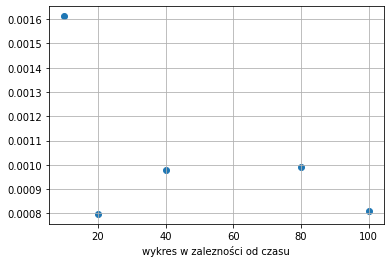

In [63]:
#3
it = [10, 20, 40, 80, 100]
blad = []
t = []
for i in it:
    t1 = %timeit -r 3 -n 5 -o (sp_linalg.cg(A3, b3, maxiter = i ))
    t.append(t1.average)
    blad.append(t1.stdev)

plt.scatter(it, t)
plt.xlabel("wykres w zalezności od czasu")
plt.grid()
plt.show()

876 µs ± 45.9 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
929 µs ± 124 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
717 µs ± 47.4 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
747 µs ± 13.3 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
712 µs ± 104 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


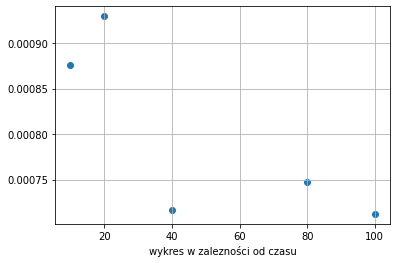

In [64]:
#4
it = [10, 20, 40, 80, 100]
blad = []
t = []
for i in it:
    t1 = %timeit -r 3 -n 5 -o (sp_linalg.gmres(A3, b3, maxiter = i ))
    t.append(t1.average)
    blad.append(t1.stdev)

plt.scatter(it, t)
plt.xlabel("wykres w zalezności od czasu")
plt.grid()
plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)